# Importing necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mp
import os
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 

# Exploratory Data analysis 

In [2]:
os.listdir("D:\\plant diseases detection\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train")

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spid

In [3]:
#Number of leaf diseases present in our data
len(os.listdir("D:\\plant diseases detection\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\
train"))

38

# Image preprocessing 

In [4]:
#Loading our images to Data Generator for Training data and Validation data in order to preprocess the 
#images 

new_train_data=ImageDataGenerator(
    rescale=1/255.0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

new_valid_data=ImageDataGenerator(rescale=1/255.0)

In [5]:
 #Loading our images 
train= new_train_data.flow_from_directory(directory="D:\\plant diseases detection\\New Plant Diseases Dataset(Augmented)\\
New Plant Diseases Dataset(Augmented)\\train",target_size=(224,224),batch_size=128,class_mode = 'categorical',color_mode="rgb",
    shuffle=True)
valid=new_valid_data.flow_from_directory(directory="D:\\plant diseases detection\\New Plant Diseases Dataset(Augmented)\\
New Plant Diseases Dataset(Augmented)\\valid",target_size=(224,224),batch_size=128,class_mode = 'categorical',color_mode="rgb",
    shuffle=True)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [6]:
class_dict = list(train.class_indices.keys())
print(class_dict)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [7]:
tst_img,label=train.next()

In [8]:
# number of images,weidth,height and channels
tst_img.shape

(128, 224, 224, 3)

In [9]:
#plotting the some images
def plotimag(img_arr,label):
    for im,l in zip(img_arr,label):
        mp.figure(figsize=(5,5))
        mp.imshow(im)
        mp.show()

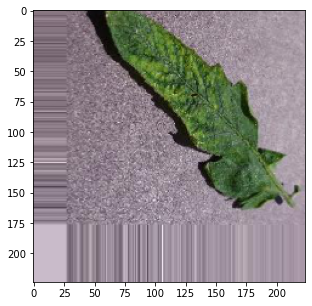

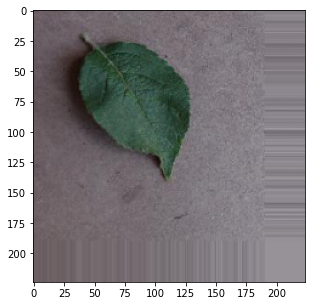

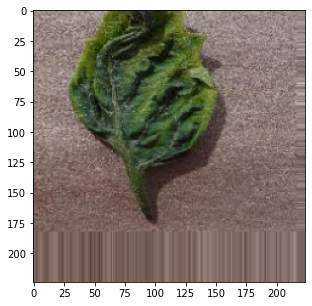

In [10]:
plotimag(tst_img[:3],label[:3])

# Building the model using AlexNet Architecture 

In [11]:
#importing necessary keras libraries and packages

from keras.models import Model,Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [12]:
# Initializing the CNN
classifier = Sequential()

# Convolution Step 1
classifier.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))

# Max Pooling Step 1
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Convolution Step 2
classifier.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))

# Max Pooling Step 2
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
classifier.add(BatchNormalization())

# Convolution Step 3
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 4
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 5
classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

# Max Pooling Step 3
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Flattening Step
classifier.add(Flatten())

# Full Connection Step
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 38, activation = 'softmax'))

# Model summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         8

In [13]:
# let's visualize the layer names and layer indices to see how many layers
for i, layer in enumerate(classifier.layers[:20]):
    print(i, layer.name)
    layer.trainable = False   

0 conv2d
1 max_pooling2d
2 batch_normalization
3 conv2d_1
4 max_pooling2d_1
5 batch_normalization_1
6 conv2d_2
7 batch_normalization_2
8 conv2d_3
9 batch_normalization_3
10 conv2d_4
11 max_pooling2d_2
12 batch_normalization_4
13 flatten
14 dense
15 dropout
16 batch_normalization_5
17 dense_1
18 dropout_1
19 batch_normalization_6


# Loading the weights to the model

In [14]:
classifier.load_weights('C:\\Users\\91910\\weights_dir\\best_weights_9.hdf5')

# Compiling the model

In [15]:
classifier.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, decay=0.005),
                   loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

# Early Stopping and Model Check point 

In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# early stopping
early_stop= EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=4,verbose=1 )

# model check point 
weightpath = "best_weights_9.hdf5"
model_check= ModelCheckpoint(weightpath
                             ,monitor="val_accuracy",
                             min_delta=0.01,
                             patience=4,
                             verbose=1,
                             save_best_only=True,
                             mode="max")

#saving model
filepath='best_model.h5'

classifier.save(filepath)
call_back=[early_stop,model_check]
 

# Fitting images to CNN

In [17]:
hist=classifier.fit_generator(train,
                         steps_per_epoch=30,
                         epochs=60,
                         verbose=1,
                         callbacks=call_back,
                         validation_data=valid,validation_steps=16
                          )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/60
30/30 [==============================] - ETA: 0s - loss: 0.1111 - accuracy: 0.9599
Epoch 00001: val_accuracy improved from -inf to 0.97119, saving model to best_weights_9.hdf5
30/30 [==============================] - 315s 10s/step - loss: 0.1111 - accuracy: 0.9599 - val_loss: 0.0910 - val_accuracy: 0.9712
Epoch 2/60
30/30 [==============================] - ETA: 0s - loss: 0.0963 - accuracy: 0.9688
Epoch 00002: val_accuracy did not improve from 0.97119
30/30 [==============================] - 286s 10s/step - loss: 0.0963 - accuracy: 0.9688 - val_loss: 0.0934 - val_accuracy: 0.9697
Epoch 3/60
30/30 [==============================] - ETA: 0s - loss: 0.1147 - accuracy: 0.9635
Epoch 00003: val_accuracy did not improve from 0.97119
30/30 [==============================] - 256s 9s/step - loss: 0.1147 - accuracy: 0.9635 - val_loss: 0.0904 - val_accuracy: 0.9707
Epoch 4/60
30/30 [=============================

# Evaluating model

In [18]:
h=hist.history
h.keys()
#h_keys(['loss','accuracy','val_loss','val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
from keras.models import load_model
classifier=load_model("C:\\Users\\91910\\best_model.h5")

In [20]:
# Checking the accuracy of our model
acc=classifier.evaluate_generator(valid,verbose=1)[1]

print(f"The accuracy of your model is = {acc*100} %")

Instructions for updating:
Please use Model.evaluate, which supports generators.
138/138 [==============================] - 307s 2s/step - loss: 0.1073 - accuracy: 0.9633
The accuracy of your model is = 96.32938504219055 %


# Visualising Training progress 

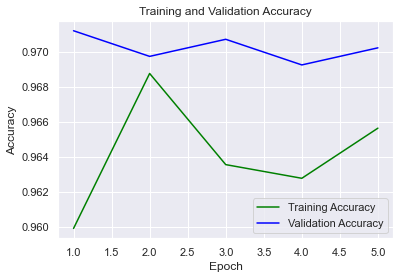

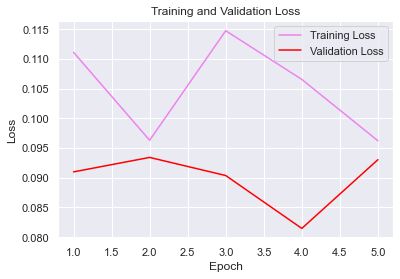

In [21]:
sns.set()
acc = h['accuracy']
val_acc = h['val_accuracy']
loss = h['loss']
val_loss = h['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
mp.plot(epochs, acc, color='green', label='Training Accuracy')
mp.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
mp.title('Training and Validation Accuracy')
mp.ylabel('Accuracy')
mp.xlabel('Epoch')
mp.legend()

mp.figure()
# loss plot
mp.plot(epochs, loss, color='violet', label='Training Loss')
mp.plot(epochs, val_loss, color='red', label='Validation Loss')
mp.title('Training and Validation Loss')
mp.xlabel('Epoch')
mp.ylabel('Loss')
mp.legend()

mp.show()

# Predicting the image 

Following is our prediction:


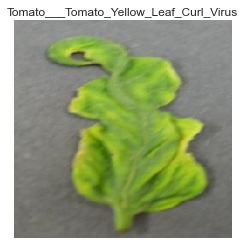

In [25]:
from keras.preprocessing import image

def predict(image_path):
    new_img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(new_img)
    img = np.expand_dims(img, axis=0)
    img = img/255

    print("Following is our prediction:")
    prediction = classifier.predict(img)
# Decoding the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
    d = prediction.flatten()
    j = d.max()
    for index,item in enumerate(d):
        if item == j:
            class_name = class_dict[index]
        
        
        
# Ploting image with predicted class name        
    mp.figure(figsize = (4,4))
    mp.imshow(new_img)
    mp.axis('off')
    mp.title(class_name)
    mp.show()        
    

predict("C:\\Users\\91910\\test\\PotatoEarlyBlight1.JPG")    